In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, AveragePooling2D
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Print shapes of the data
print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [ ]:
# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Check the shapes after preprocessing
print(f'Normalized training data shape: {X_train.shape}')
print(f'One-hot encoded training labels shape: {y_train.shape}')

Normalized training data shape: (50000, 32, 32, 3)
One-hot encoded training labels shape: (50000, 10)


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),  # Pooling layer

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),  # Pooling layer

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),  # Pooling layer

    Conv2D(265, (3, 3), activation='relu', padding='same'),
    Conv2D(265, (3, 3), activation='relu', padding='same'),
    Conv2D(265, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),  # Pooling layer

    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),  # Pooling layer

    Flatten(),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_57 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_58 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_60 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_61 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_62 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_63 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_64 (Conv2D)                   │ (None, 4, 4, 265)           │         305,545 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_65 (Conv2D)                   │ (None, 4, 4, 265)           │         632,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_66 (Conv2D)                   │ (None, 4, 4, 265)           │         632,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 4, 4, 265)           │           1,060 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 2, 2, 265)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_67 (Conv2D)                   │ (None, 2, 2, 512)           │       1,221,632 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 9,033,563 (34.46 MB)

 Trainable params: 9,031,561 (34.45 MB)

 Non-trainable params: 2,002 (7.82 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train with early stopping
trained = model.fit(X_train, y_train, epochs=50, batch_size=64,
                    validation_split =0.2, callbacks=[early_stopping, reduce_lr, model_checkpoint])

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 25ms/step - accuracy: 0.2118 - loss: 2.0339 - val_accuracy: 0.2682 - val_loss: 2.1638 - learning_rate: 0.0010
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.4051 - loss: 1.5575 - val_accuracy: 0.5300 - val_loss: 1.2850 - learning_rate: 0.0010
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.5744 - loss: 1.1859 - val_accuracy: 0.5526 - val_loss: 1.3808 - learning_rate: 0.0010
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.6708 - loss: 0.9387 - val_accuracy: 0.6766 - val_loss: 0.9509 - learning_rate: 0.0010
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.7240 - loss: 0.8025 - val_accuracy: 0.7121 - val_loss: 0.8523 - learning_rate: 0.0010
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.7674 - loss: 0.6841 - val_accuracy: 0.6442 - val_loss: 1.1150 - learning_rate: 0.0010
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.8032 - l

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Epoch')

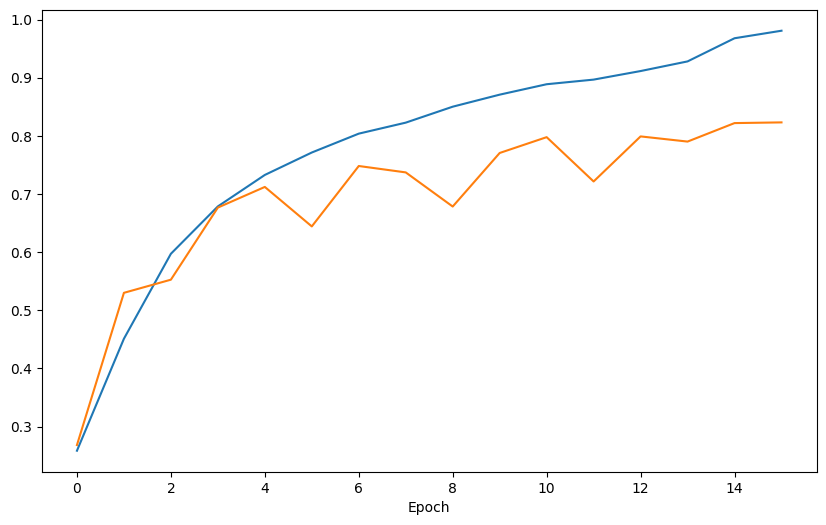

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(trained.history['accuracy'], label='Training accuracy')
plt.plot(trained.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1) # Get the predicted class labels

# Convert y_test to multiclass format
y_test_multiclass = np.argmax(y_test, axis=1)  # Assuming y_test is one-hot encoded

accuracy = accuracy_score(y_test_multiclass, y_pred)
precision = precision_score(y_test_multiclass, y_pred, average='weighted')
recall = recall_score(y_test_multiclass, y_pred, average='weighted')
f1 = f1_score(y_test_multiclass, y_pred, average='weighted')

# Print the classification metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Print the classification report
print('\nClassification Report:')
print(classification_report(y_test_multiclass, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step
Accuracy: 0.7909
Precision: 0.7985693568353154
Recall: 0.7909
F1 Score: 0.7927518417182858

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1000
           1       0.91      0.86      0.88      1000
           2       0.70      0.74      0.72      1000
           3       0.59      0.61      0.60      1000
           4       0.84      0.72      0.78      1000
           5       0.66      0.77      0.71      1000
           6       0.82      0.86      0.84      1000
           7       0.91      0.76      0.83      1000
           8       0.91      0.86      0.88      1000
           9       0.87      0.88      0.88      1000

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.79      0.79     10000

